<div align = 'center'>

# __MARCOS BARRAGÁN CORREDERA__

## Práctica: Examen 2019

### ETL

<div align = 'right'>
<font color = 'orange'>
CUNEF

## 1. The World Bank's international debt data
<p>No es que los humanos solo tengamos deudas para administrar nuestras necesidades. Un país también puede endeudarse para administrar su economía. Por ejemplo, el gasto en infraestructura es un ingrediente costoso requerido para que los ciudadanos de un país lleven una vida cómoda. El Banco Mundial es la organización que proporciona deuda a los países.</p>

<!-- <p>En este notebook, vamos a analizar los datos de la deuda internacional recopilados por el Banco Mundial. El conjunto de datos contiene información sobre el monto de la deuda (en USD) que deben los países en desarrollo en varias categorías.</p>  -->
    

"Disbursements on external debt, long-term (DIS, current US$)",DT.DIS.DLXF.CD

"Interest payments on external debt, long-term (INT, current US$)",DT.INT.DLXF.CD

"PPG, bilateral (AMT, current US$)",DT.AMT.BLAT.CD

"PPG, bilateral (DIS, current US$)",DT.DIS.BLAT.CD

"PPG, bilateral (INT, current US$)",DT.INT.BLAT.CD

"PPG, multilateral (AMT, current US$)",DT.AMT.MLAT.CD

"PPG, multilateral (DIS, current US$)",DT.DIS.MLAT.CD

"PPG, multilateral (INT, current US$)",DT.INT.MLAT.CD

"PPG, official creditors (AMT, current US$)",DT.AMT.OFFT.CD

"PPG, official creditors (DIS, current US$)",DT.DIS.OFFT.CD

"PPG, official creditors (INT, current US$)",DT.INT.OFFT.CD

"Principal repayments on external debt, long-term (AMT, current US$)",DT.AMT.DLXF.CD

"Interest payments on external debt, private nonguaranteed (PNG) (INT, current US$)",DT.INT.DPNG.CD

"PPG, bonds (AMT, current US$)",DT.AMT.PBND.CD

"PPG, bonds (INT, current US$)",DT.INT.PBND.CD

"PPG, commercial banks (AMT, current US$)",DT.AMT.PCBK.CD

"PPG, commercial banks (DIS, current US$)",DT.DIS.PCBK.CD

"PPG, commercial banks (INT, current US$)",DT.INT.PCBK.CD

"PPG, other private creditors (AMT, current US$)",DT.AMT.PROP.CD

"PPG, other private creditors (DIS, current US$)",DT.DIS.PROP.CD

"PPG, other private creditors (INT, current US$)",DT.INT.PROP.CD

"PPG, private creditors (AMT, current US$)",DT.AMT.PRVT.CD

"PPG, private creditors (DIS, current US$)",DT.DIS.PRVT.CD

"PPG, private creditors (INT, current US$)",DT.INT.PRVT.CD

"Principal repayments on external debt, private nonguaranteed (PNG) (AMT, current US$)",DT.AMT.DPNG.CD

Series Name,Series Code
"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN

"Central government debt, total (current LCU)",GC.DOD.TOTL.CN

"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS

### __1. Inicializar y cargar el contexto spark__

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz
!tar xf spark-2.4.7-bin-hadoop2.7.tgz
!pip install -q findspark

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"

In [3]:
import findspark 
findspark.init()
from pyspark import SparkContext
sc = SparkContext.getOrCreate()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

Abrimos los datos que tenemos que leer para la práctica:

In [52]:
from pyspark.sql import Row

In [53]:
data_file_1 = "./indicadores_deuda.csv"
raw_data_1 = sc.textFile(data_file_1)
data_file_2 = "./indicadores_desarrollo.csv"
raw_data_2 = sc.textFile(data_file_2)
data_file_3 = "./explicacion_varDeu1920.csv"
raw_data_3 = sc.textFile(data_file_3)
data_file_4 = "./explicacion_var1920.csv"
raw_data_4 = sc.textFile(data_file_4)

Si observamos el comportamiento de las diferentes bases de datos:

In [154]:
raw_data_1.take(5)

['country_name,country_code,DT.AMT.BLAT.CD,DT.AMT.DLXF.CD,DT.AMT.DPNG.CD,DT.AMT.MLAT.CD,DT.AMT.OFFT.CD,DT.AMT.PBND.CD,DT.AMT.PCBK.CD,DT.AMT.PROP.CD,DT.AMT.PRVT.CD,DT.DIS.BLAT.CD,DT.DIS.DLXF.CD,DT.DIS.MLAT.CD,DT.DIS.OFFT.CD,DT.DIS.PCBK.CD,DT.DIS.PROP.CD,DT.DIS.PRVT.CD,DT.INT.BLAT.CD,DT.INT.DLXF.CD,DT.INT.DPNG.CD,DT.INT.MLAT.CD,DT.INT.OFFT.CD,DT.INT.PBND.CD,DT.INT.PCBK.CD,DT.INT.PROP.CD,DT.INT.PRVT.CD',
 'Afghanistan,AFG,61739336.9,100847181.9,,39107845,100847181.9,,,,,49114729.4,72894453.7,23779724.3,72894453.7,,,,39903620.1,53239440.1,,13335820,53239440.1,,,,',
 'Albania,ALB,54250280.6,790248675.2,514185620,182197616.7,236447897.3,0,39445139.5,170018.4,39615157.9,76050616.1,317194512.5,234321242.3,310371858.4,4542664.9,2279989.2,6822654.1,13847333.6,165602386.9,87884000,28101536.1,41948869.7,31030688.2,4618504.3,120324.7,35769517.2',
 'Algeria,DZA,95188724.6,171185188.1,75420000,0,95188724.6,,576463.5,0,576463.5,10320772.2,10320772.2,,10320772.2,,,,7680627.6,19031728.7,3220000,8094779,

In [6]:
raw_data_2.take(5)

['country_name,country_code,anho,GC.DOD.TOTL.CN,GC.DOD.TOTL.GD.ZS,SP.DYN.CBRT.IN',
 'Albania,ALB,2014 [YR2014],1023040800000,73.3202469198429,12.259',
 'Albania,ALB,2015 [YR2015],1145500940000,79.8644448747259,12.197',
 'Albania,ALB,2016 [YR2016],1188814490000,80.7355748396923,12.08',
 'Australia,AUS,2014 [YR2014],674700000,0.042207528166503,13.2']

In [7]:
raw_data_3.take(5)

['indicator_name,indicator_code',
 '"Disbursements on external debt, long-term (DIS, current US$)",DT.DIS.DLXF.CD',
 '"Interest payments on external debt, long-term (INT, current US$)",DT.INT.DLXF.CD',
 '"PPG, bilateral (AMT, current US$)",DT.AMT.BLAT.CD',
 '"PPG, bilateral (DIS, current US$)",DT.DIS.BLAT.CD']

In [8]:
raw_data_4.take(8)

['Series Name,Series Code',
 '"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN',
 '"Cause of death, by injury (% of total)",SH.DTH.INJR.ZS',
 '"Central government debt, total (current LCU)",GC.DOD.TOTL.CN',
 '"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS',
 '"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",SH.ALC.PCAP.LI',
 '"Total alcohol consumption per capita, female (liters of pure alcohol, projected estimates, female 15+ years of age)",SH.ALC.PCAP.FE.LI',
 '"Total alcohol consumption per capita, male (liters of pure alcohol, projected estimates, male 15+ years of age)",SH.ALC.PCAP.MA.LI']

Para trabajar más cómodamente con los datos, debemos eliminar previamente la cabecera. Esto se puede hacer de varias maneras, pero la que utilicé yo será emplear la función _parallelize_. Esto es:





In [421]:
cabecera_deuda = raw_data_1.first()
cabecera_deuda_paralellize = sc.parallelize([cabecera_deuda])
deuda = raw_data_1.subtract(cabecera_deuda_paralellize)

In [422]:
datos_deuda = deuda.\
  map(lambda x: x.split(',')).\
  map(lambda x: Row(
      nombre_pais = x[-0],
      indicador_AMT_BLAT = (x[-25]),
      indicador_AMT_DLXF = (x[-24]),
      indicador_DIS_BLAT = (x[-16]),
      indicador_INT_BLAT = (x[-9]),
      indicador_AMT_MLAT = (x[-22])
  ))

In [423]:
datos_deuda.take(3)

[Row(indicador_AMT_BLAT='8473824016.3', indicador_AMT_DLXF='11067045628.1', indicador_AMT_MLAT='124688691.9', indicador_DIS_BLAT='8838256901.1', indicador_INT_BLAT='1005053965.1', nombre_pais='Angola'),
 Row(indicador_AMT_BLAT='68968314.7', indicador_AMT_DLXF='845630723.8', indicador_AMT_MLAT='94331207.1', indicador_DIS_BLAT='174269846.7', indicador_INT_BLAT='24094832', nombre_pais='Armenia'),
 Row(indicador_AMT_BLAT='35764202.8', indicador_AMT_DLXF='1883205166.2', indicador_AMT_MLAT='228993019.8', indicador_DIS_BLAT='', indicador_INT_BLAT='6012379.2', nombre_pais='Bulgaria')]

In [279]:
def remove_nas(x):

  if x == '':

    return 0

  else:

    return float(x)

datos_deuda = datos_deuda.map(lambda line: (line[-1], remove_nas(line[0]), remove_nas(line[1]), remove_nas(line[2]), remove_nas(line[3]), remove_nas(line[4])))

El orden es: 

+ Posición [0]: País
+ Posición [1]: AMT_BLAT
+ Posición [2]: AMT_DLXF
+ Posición [3]: AMT_MLAT
+ Posición [4]: DIS_BLAT
+ Posición [5]: INT_BLAT

In [348]:
datos_deuda.take(2)

[('Angola',
  8473824016.3,
  11067045628.1,
  124688691.9,
  8838256901.1,
  1005053965.1),
 ('Armenia', 68968314.7, 845630723.8, 94331207.1, 174269846.7, 24094832.0)]

En el caso de __indicadores de desarrollo__ la cosa es más sencilla, pues no aparecen valores nulos, por lo que simplemente hay que separarlo por comas y escoger las columnas que queremos. 

Primero, como antes, eliminaré la cabecera:

In [12]:
cabecera_desarrollo = raw_data_2.first()
cabecera_desarrollo_paralellize = sc.parallelize([cabecera_desarrollo])
desarrollo = raw_data_2.subtract(cabecera_desarrollo_paralellize)

In [229]:
desarrollo.take(3)

['Albania,ALB,2015 [YR2015],1145500940000,79.8644448747259,12.197',
 'Australia,AUS,2014 [YR2014],674700000,0.042207528166503,13.2',
 'Belarus,BLR,2015 [YR2015],33804450453.3197,37.5981780556757,12.5']

Los datos de desarrollo hay que separarlos, igual que los anteriores, por comas. Una vez separados, procedo de forma similar a los de deuda.

In [17]:
datos_desarrollo = desarrollo.map(lambda x: x.split(","))

In [18]:
datos_desarrollo.take(2)

[['Albania',
  'ALB',
  '2015 [YR2015]',
  '1145500940000',
  '79.8644448747259',
  '12.197'],
 ['Australia',
  'AUS',
  '2014 [YR2014]',
  '674700000',
  '0.042207528166503',
  '13.2']]

Realmente, para la práctica, solo vamos a necesitar los datos de nombre del país, años e indicadores. Ocurre lo mismo que antes: algunos países, al tener nombres más largos o posibles pseudónimos, puede que presenten ese valor en la columna 2, generando un desplazamiento de todas ellas hacia la derecha. Sin embargo, esto no ocurre ni con los años ni con los indicadores, que siempre ocupan una única posición. Por tanto, para evitar complicaciones en las definiciones de las transformaciones, tomaré los datos "a la inversa"; es decir,cogeré los datos como los "- i-ésima posición". Además, como sé (por estudio anterior) que no hay strings ni nulos en esta tabla, podré formatearlos directamente a tipo float a los distintos indicadores.

In [241]:
datos_desarrollo = datos_desarrollo.map(lambda x: (x[0], x[-4], float(x[-3]), float(x[-2]), float(x[-1])))

datos_desarrollo.take(3)

[('Albania', '2015 [YR2015]', 1145500940000.0, 79.8644448747259, 12.197),
 ('Australia', '2014 [YR2014]', 674700000.0, 0.042207528166503, 13.2),
 ('Belarus', '2015 [YR2015]', 33804450453.3197, 37.5981780556757, 12.5)]

El orden de _datos_desarrollo_ es: 

+ Posición [0]: País
+ Posición [1]: Años
+ Posición [2]: GC.DOD.TOTL.CN
+ Posición [3]: GC.DOD.TOTL.GD.ZS
+ Posición [4]: SP.DYN.CBRT.IN

### __2. Número de países distintos en cada dataset. ¿Coinciden?__

---



Las dos únicas columnas útiles para averiguar el número de países son los dos primeros datasets, ya que los que comienzan como "explicacion_..." no presentan información acerca de los países.

In [418]:
paises_deuda = datos_deuda.map(lambda x: (x[0]))
print("En el dataset indicadores_deuda, hay un total de:", 
      paises_deuda.distinct().count(), "países diferentes")

En el dataset indicadores_deuda, hay un total de: 123 países diferentes


In [419]:
paises_desarrollo = datos_desarrollo.map(lambda x: x[0])

print("En el dataset indicadores_desarrollo, hay un total de:", 
      paises_desarrollo.distinct().count(), "países diferentes")

En el dataset indicadores_desarrollo, hay un total de: 51 países diferentes


Como vemos, el número de países difiere en ambos conjuntos. En el dataset de indicadores de deuda aparecen más del doble de los que aparecen en el de desarrollo

### __3. Total de deuda contraida por cada pais: total amount of debt (in USD) DT.AMT.MLAT.CD__

La columna DT.AMT.MLAT.CD es la columna 2 en el RDD de _datos_deuda_ ya tratado (recordemos que en Python la primera columna es la 0). Mostraré los resultados como una tupla tipo (País, Deuda) para ver cómodamente el valor de la deuda para cada país.

In [412]:
total_deuda = datos_deuda.map(lambda x: (x[0], float(x[3])))

Pongo el distinct para que me coja cada país una sola vez.

Ordenándolos de menor a mayor (por ponerlos de alguna manera), vemos que en Algeria aparece un 0, ya que lo había introducido como inmputación de los nulos.

In [417]:
total_deuda.sortBy(lambda x: x[-1], True).distinct().take(5)

[('Algeria', 0.0),
 ('Timor-Leste', 825000.0),
 ('Comoros', 2182053.1),
 ('Vanuatu', 2593419.3),
 ('Solomon Islands', 3952828.9)]

### __4. Media de los indicadores de deuda (tabla uno): DT.AMT.BLAT.CD, DT.DIS.BLAT.CD, DT.INT.BLAT.CD__

Importante: aunque antes haya decidido, por simplicidad, imputar los valores nulos por 0, no los consideraré a la hora de realizar la media, ya que estaría introduciendo cierto sesgo "hacia abajo", pues un valor de 0 en unas observaciones de tipo $10^{7-9}$. Además, la media penaliza mucho los valores extremos, ya que es muy sensible a los mismos. Por ello, los dejo fuera para el cálculo de las mismas en los diferentes indicadores.

In [270]:
media_AMT_BLAT = datos_deuda.map(lambda x: (x[0], x[1])).filter(lambda x: x[1] != 0).map(lambda x: x[1]).mean()

In [271]:
print("La media del indicador DT.AMT.BLAT.CD es:", round(media_AMT_BLAT,2))

La media del indicador DT.AMT.BLAT.CD es: 5904868401.5


In [282]:
media_AMT_BLAT = datos_deuda.map(lambda x: (x[0], x[4])).filter(lambda x: x[1] != 0).map(lambda x: x[1]).mean()

In [283]:
print("La media del indicador DT.INT.BLAT.CD es:", round(media_AMT_BLAT,2))

La media del indicador DT.INT.BLAT.CD es: 1223139290.4


In [284]:
media_AMT_BLAT = datos_deuda.map(lambda x: (x[0], x[-1])).filter(lambda x: x[1] != 0).map(lambda x: x[1]).mean()

In [285]:
print("La media del indicador DT.DIS.BLAT.CD es:", round(media_AMT_BLAT,2))

La media del indicador DT.DIS.BLAT.CD es: 164093285.61


La otra forma de hacer la media, sin usar el _.mean()_, sería: 

In [286]:
datos_deuda.map(lambda x: (x[0], x[-1])).filter(lambda x: x[1] != 0).map(lambda x: x[1]).sum()/datos_deuda.map(lambda x: (x[0], x[-1])).filter(lambda x: x[1] != 0).map(lambda x: x[1]).count()

164093285.6090164

Como vemos, coinciden, por lo que da lo mismo usar el _.mean()_ de Python o la forma tradicional de calcularlo.

### __5. Los 20 paises con DT.AMT.DLXF.CD más alto__

Dicho indicador es el que se encuentra en la segunda posición del _datos_deuda_ que he generado antes. Ordenándolo de mayor a menor y cogiendo los 20 primeros que nos piden:

In [293]:
top_paises = datos_deuda.map(lambda x: (x[0],x[2])).sortBy(lambda x: x[-1], False)

top_paises.take(20)

[('China', 96218620835.7),
 ('Brazil', 90041840304.1),
 ('Russian Federation', 66589761833.5),
 ('Turkey', 51555031005.8),
 ('South Asia', 48756295898.2),
 ('India', 31923507000.8),
 ('Indonesia', 30916112653.8),
 ('Kazakhstan', 27482093686.4),
 ('Mexico', 25218503927.0),
 ('Least developed countries: UN classification', 25197029299.4),
 ('IDA only', 20483289208.0),
 ('Romania', 14013783350.4),
 ('Colombia', 11985674438.7),
 ('Angola', 11067045628.1),
 ('Cameroon', 10404814960.2),
 ('"Venezuela', 9878659207.2),
 ('"Egypt', 9692114176.9),
 ('Lebanon', 9506919669.6),
 ('South Africa', 9474257551.9),
 ('Vietnam', 8873505909.2)]

### __6. Pais con los datos informados todos los años.__

Este ejercicio es algo más complejo. En primer lugar, tomaré la columna de los países de los datos de indicadores de desarrollo y le asignaré un 1 a cada uno. En segundo lugar, con un reduceByKey, lo que hará será sumar aquellos valores para los casos coincidentes en países. Una vez hecho esto, lo que haré será ordenarlos de mayor a menor valor de dicho conteo.
Por último, si ponemos el filtro de los que sean iguales a 4, obtenemos que el único que hay es Malawi.

In [298]:
years_completo = datos_desarrollo.map(lambda x: (x[0], 1)).reduceByKey(lambda x, y: x+y).sortBy(lambda x: x[1], False)

# Hacemos un filtro para que nos devuelva únicamente los que tengan 4 valores. 

years_completo = years_completo.filter(lambda x: x[1] == 4)

Solo hay un país que es __Malawi__.

In [299]:
years_completo.collect()

[('Malawi', 4)]

### __7. Media anual de los distintos indicadores de desarrollo__

Emplearé un _combineByKey_ para el cálculo conjunto de las medias en los diferentes años. De esta manera, lo primero que haré será considerar la suma total de los valores de cada indicador (por la columna) y aplicar un conteo por el número de veces que aparece la clave de "year" en este caso. 

Posteriormente, dividiendo uno entre otro, obtenemos la media por países.

__a) Indicadores GC.DOD.TOTL.CN__:

In [333]:
# La posición 1 es el año y la 2 la del indicador:
indicadores_desarrollo_1_años = datos_desarrollo.map(lambda x: (x[1], x[2])) #reduceByKey(lambda x, y: x+y)

contadores_1 = indicadores_desarrollo_1_años.combineByKey(
                                                          (lambda x: (x, 1)), # the initial value, with value x and count 1
                                                          (lambda x, y: (acc[0]+value, acc[1]+1)), # how to combine a pair value with the accumulator: sum value, and increment count
                                                          (lambda x, y: (x[0]+y[0], x[1]+y[1])) # combine accumulators

                                                  )

contadores_1.collect()

[('2014 [YR2014]', (5172137936647662.0, 50)),
 ('2015 [YR2015]', (5800273772299710.0, 44)),
 ('2016 [YR2016]', (6193739040374572.0, 39)),
 ('2017 [YR2017]', (2239858619962.69, 1))]

In [334]:
media_años_indicadores_1 = contadores_1.map(lambda x: (x[0], round(x[1][0]/x[1][1], 2))).sortBy(lambda y: y[0]).collect()
media_años_indicadores_1

[('2014 [YR2014]', 103442758732953.23),
 ('2015 [YR2015]', 131824403915902.5),
 ('2016 [YR2016]', 158813821548065.94),
 ('2017 [YR2017]', 2239858619962.69)]

__b) Indicadores GC.DOD.TOTL.GD.ZS__

In [328]:
# La posición 1 es el año y la 3 la del indicador:
indicadores_desarrollo_2_años = datos_desarrollo.map(lambda x: (x[1], x[3])) 

contadores_2 = indicadores_desarrollo_2_años.combineByKey(
                                                          (lambda x: (x, 1)), # the initial value, with value x and count 1
                                                          (lambda x, y: (x[0]+y, x[1]+1)), # how to combine a pair value with the accumulator: sum value, and increment count
                                                          (lambda x, y: (x[0]+y[0], x[1]+y[1])) # combine accumulators

                                                          )

contadores_2.collect()

[('2014 [YR2014]', (2842.195717219219, 50)),
 ('2015 [YR2015]', (2568.0863271747353, 44)),
 ('2016 [YR2016]', (2293.081035336326, 39)),
 ('2017 [YR2017]', (48.659564238322, 1))]

In [331]:
media_años_indicadores_2 = contadores_2.map(lambda x: (x[0], round(x[1][0]/x[1][1], 2))).sortBy(lambda y: y[0]).collect()
media_años_indicadores_2

[('2014 [YR2014]', 56.84),
 ('2015 [YR2015]', 58.37),
 ('2016 [YR2016]', 58.8),
 ('2017 [YR2017]', 48.66)]

__c) Indicadores de SP.DYN.CBRT.IN__

In [335]:
# La posición 1 es el año y la 4 la del indicador:

indicadores_desarrollo_3_años = datos_desarrollo.map(lambda x: (x[1], x[4])) #reduceByKey(lambda x, y: x+y)

contadores_3 = indicadores_desarrollo_3_años.combineByKey(
                                                          (lambda x: (x, 1)), # the initial value, with value x and count 1
                                                          (lambda acc, value: (acc[0]+value, acc[1]+1)), # how to combine a pair value with the accumulator: sum value, and increment count
                                                          (lambda acc1, acc2: (acc1[0]+acc2[0], acc1[1]+acc2[1])) # combine accumulators

                                                          )

contadores_3.collect()

[('2014 [YR2014]', (879.1310000000001, 50)),
 ('2015 [YR2015]', (739.133, 44)),
 ('2016 [YR2016]', (629.6290000000001, 39)),
 ('2017 [YR2017]', (34.593, 1))]

In [336]:
media_años_indicadores_3 = contadores_3.map(lambda x: (x[0], round(x[1][0]/x[1][1], 2))).sortBy(lambda y: y[0]).collect()
media_años_indicadores_3

[('2014 [YR2014]', 17.58),
 ('2015 [YR2015]', 16.8),
 ('2016 [YR2016]', 16.14),
 ('2017 [YR2017]', 34.59)]

### __8. Podrías decirme el total de deuda acumulada DT.AMT.MLAT.CD por los 10 países con un valor en media menor de SP.DYN.CBRT.IN__

Calculamos los países que menor deuda acumulada presentan mediante un _combineByKey_. Lo hago así porque hay países que presentan más datos que otros, pues aparecen sus resultados varios años consecutivos. 

Para evitar introducir este sesgo en los cálculos, calculo la media de dicho indicador para cada país por separado; una vez tengo esos datos, calcularé la media de dicha media por países, de manera que no tenemos penalización para aquellos países que aparecen menos años que otros. 

In [ ]:
paises_menores = datos_desarrollo.map(lambda x: (x[0], float(x[-1]))).filter(lambda y: y[-1] < media_SP_DYN).sortBy(lambda z: z[-1], True)

paises_menores = paises_menores.map(lambda x: (x[0], x[1]))

paises_menores.take(10)

[('Japan', 7.8),
 ('"Korea', 7.9),
 ('San Marino', 7.9),
 ('Japan', 8.0),
 ('Japan', 8.0),
 ('San Marino', 8.2),
 ('"Korea', 8.6),
 ('"Korea', 8.6),
 ('Spain', 8.8),
 ('Spain', 9.0)]

In [ ]:
# Indicador AMT.MLAT es la posición 3 en datos_deuda:

a = (datos_deuda.map(lambda x: (x[0], float(x[3])))).join(paises_menores)

a.map(lambda x: (x[0], float(x[1][0]))).distinct().take(10)

[('Georgia', 1552116953.6),
 ('Ukraine', 8148995625.6),
 ('Albania', 790248675.2),
 ('Colombia', 11985674438.7),
 ('St. Lucia', 20332673.8),
 ('St. Vincent and the Grenadines', 26411052.2),
 ('Turkey', 51555031005.8),
 ('Brazil', 90041840304.1),
 ('Sri Lanka', 5761489255.9),
 ('Russian Federation', 66589761833.5)]

In [362]:
# Media por países, para que no haya sesgo de que países repetidos y otros que no.

datos_desarrollo_paises = datos_desarrollo.map(lambda x: (x[0], float(x[-1]))) #reduceByKey(lambda x, y: x+y)

contador = datos_desarrollo_paises.combineByKey(
                                                  (lambda x: (x, 1)), # the initial value, with value x and count 1
                                                  (lambda acc, value: (acc[0] + value, acc[1] + 1)), # how to combine a pair value with the accumulator: sum value, and increment count
                                                  (lambda acc1, acc2: (acc1[0] + acc2[0], acc1[1] + acc2[1])) # combine accumulators

                                                  )

contador.collect()

[('Botswana', (79.253, 3)),
 ('Guatemala', (76.886, 3)),
 ('Russian Federation', (39.5, 3)),
 ('Zambia', (76.595, 2)),
 ('Hungary', (28.599999999999998, 3)),
 ('Palau', (39.4, 3)),
 ('United States', (37.1, 3)),
 ('Belize', (22.067, 1)),
 ('Switzerland', (31.4, 3)),
 ('Ukraine', (31.8, 3)),
 ('Uruguay', (42.383, 3)),
 ('Belarus', (37.4, 3)),
 ('Japan', (23.8, 3)),
 ('Jordan', (48.61, 2)),
 ('Moldova', (31.813000000000002, 3)),
 ('New Zealand', (38.599999999999994, 3)),
 ('Papua New Guinea', (56.337, 2)),
 ('Seychelles', (34.0, 2)),
 ('Spain', (27.0, 3)),
 ('Jamaica', (49.907000000000004, 3)),
 ('Georgia', (42.168, 3)),
 ('Namibia', (30.192, 1)),
 ('Singapore', (28.9, 3)),
 ('Turkey', (50.152, 3)),
 ('United Kingdom', (35.7, 3)),
 ('St. Lucia', (12.502, 1)),
 ('Albania', (36.536, 3)),
 ('Australia', (39.0, 3)),
 ('Brazil', (43.403, 3)),
 ('El Salvador', (56.202, 3)),
 ('Ireland', (41.7, 3)),
 ('Kazakhstan', (68.33000000000001, 3)),
 ('Kyrgyz Republic', (81.1, 3)),
 ('Malawi', (142.224, 

In [363]:
media_por_contador = contador.map(lambda x: (x[0], round(x[1][0]/x[1][1], 2))).sortBy(lambda y: y[-1])#.collect()
media = media_por_contador.map(lambda x: x[-1]).mean()
media

17.202156862745102

In [364]:
paises_filtrados = duration_means_by_type.map(lambda x: (x[0], float(x[1]))).filter(lambda x: x[-1] < media)

a = datos_deuda.map(lambda x: (x[0], float(x[3]))).join(paises_filtrados)

a.collect()

[('Ukraine', (1072472830.3, 10.6)),
 ('Belarus', (595438826.0, 12.47)),
 ('St. Lucia', (15019216.3, 12.5)),
 ('Jamaica', (174427648.0, 16.64)),
 ('St. Vincent and the Grenadines', (21615600.7, 15.01)),
 ('Russian Federation', (141669500.0, 13.17)),
 ('Georgia', (144062401.5, 14.06)),
 ('Turkey', (2932698678.0, 16.72)),
 ('Moldova', (135842865.5, 10.6)),
 ('Thailand', (39071571.5, 10.92)),
 ('Albania', (182197616.7, 12.18)),
 ('Brazil', (2514318741.6, 14.47)),
 ('Colombia', (1100907553.6, 15.52)),
 ('Sri Lanka', (449771961.1, 16.73))]

Cogemos solo los 10 menores, __ordenados por la media del indicador__, no por el valor de deuda:

In [354]:
a.sortBy(lambda x: x[-1][-1]).map(lambda x: (x[0], float(x[1][0]))).take(10)

[('Ukraine', 1072472830.3),
 ('Moldova', 135842865.5),
 ('Thailand', 39071571.5),
 ('Albania', 182197616.7),
 ('Belarus', 595438826.0),
 ('St. Lucia', 15019216.3),
 ('Russian Federation', 141669500.0),
 ('Georgia', 144062401.5),
 ('Brazil', 2514318741.6),
 ('St. Vincent and the Grenadines', 21615600.7)]

### __9. ¿Hay alguna relación entre los nacimientos (SP.DYN.CBRT.IN) y el indicador DT.AMT.DLXF.CD? ¿Cómo podrías demostrarlo?__

En este ejercicio nos piden calcular la correlación existente entre el indicador de nacimientos de la tabla de desarrollo y el indicador de deuda AMT.DLXF. Para llevarlo a cabo, consideraré únicamente aquellos países que coincidan en ambos bloques de datos, pues considerar todos los datos puede introducir un sesgo debido a que, como comentábamos antes, hay países que presentan información de más años que otros. Por ello, tomo la media de los países consigo mismos para el número de veces que aparecen en los datos. Esto ya lo teníamos del ejercicio anterior, y recordemos que era:

In [367]:
media_por_contador.take(8)

[('Japan', 7.93),
 ('San Marino', 8.05),
 ('"Korea', 8.37),
 ('Spain', 9.0),
 ('Hungary', 9.53),
 ('Singapore', 9.63),
 ('Switzerland', 10.47),
 ('Ukraine', 10.6)]

Una vez tengo esto, haré un join para que coincidan los países de ambos bloques, ya que si no comprobamos que son las mismas observaciones consideradas, podríamos estar considerando, por ejemplo, los datos de nacimientos de Angola con los de la deuda China, lo cual arrojaría unos resultados, en mi opinión, carentes de sentido. Por ello llevo a cabo un _join_ con los indicadores de deuda por el país:

In [384]:
deuda_nacimientos = datos_deuda.map(lambda x: (x[0], x[2])).join(media_por_contador)

deuda_nacimientos.take(6)

[('Botswana', (137995908.0, 26.42)),
 ('Ukraine', (8148995625.6, 10.6)),
 ('Guatemala', (2911981987.8, 25.63)),
 ('Jordan', (1990343479.2, 24.3)),
 ('Belarus', (4640037884.2, 12.47)),
 ('St. Lucia', (20332673.8, 12.5))]

Me quedo únicamente con los datos numéricos: 

In [385]:
deuda_nacimientos = deuda_nacimientos.map(lambda x: (x[1][0], x[1][1]))

deuda_nacimientos.take(5)

[(137995908.0, 26.42),
 (8148995625.6, 10.6),
 (2911981987.8, 25.63),
 (1990343479.2, 24.3),
 (4640037884.2, 12.47)]

In [387]:
deud = deuda_nacimientos.map(lambda x: x[0]).collect()

nacim = deuda_nacimientos.map(lambda x: x[1]).collect()

In [392]:
import numpy as np

print('El coeficiente de correlación entre ambas variables es de:', np.corrcoef(deud, nacim)[0][1])

El coeficiente de correlación entre ambas variables es de: -0.25828338549202556


Si los graficamos, para ver el comportamiento de una frente a la otra:

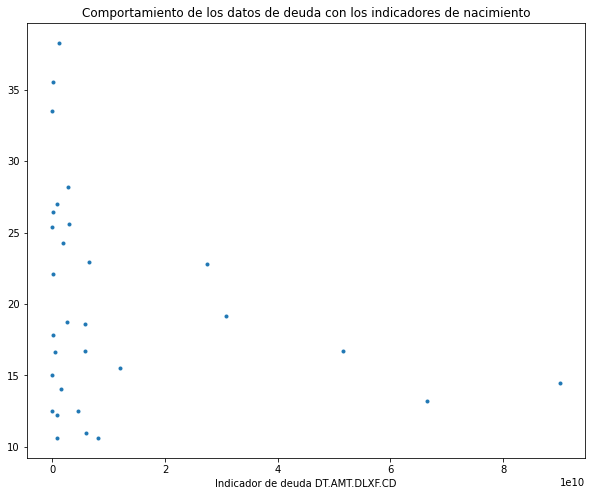

In [410]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 8))

plt.plot(deud, nacim, marker = '.', ls = 'None')
plt.xlabel('Indicador de deuda DT.AMT.DLXF.CD')
plt.title('Comportamiento de los datos de deuda con los indicadores de nacimiento');

A la vista de los resultados matemáticos y gráficos, vemos que no parece haber una correlación, para nuestros datos, entre el indicador de nacimientos y el indicador de deuda citado. 

Si ponemos el eje X en escala logarítmica (pues los datos son mucho mayores y tienen un rango de valores mucho mayor), no aclaramos gran cosa. 

Por tanto, concluiré en que la relación patente entre ambas variables es muy baja.

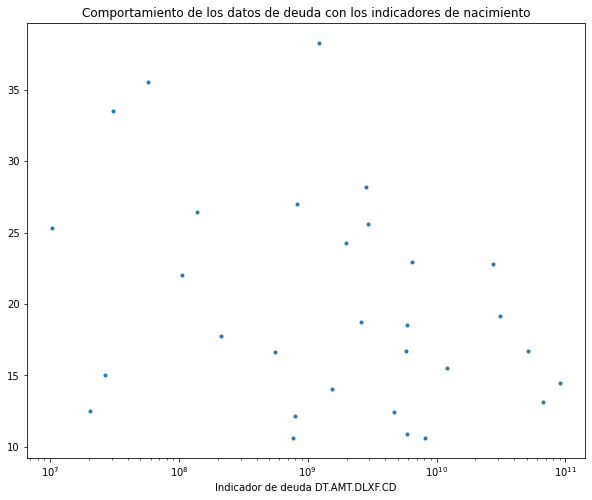

In [411]:
plt.figure(figsize = (10, 8))

plt.plot(deud, nacim, marker = '.', ls = 'None')
plt.xscale('log')
plt.xlabel('Indicador de deuda DT.AMT.DLXF.CD')
plt.title('Comportamiento de los datos de deuda con los indicadores de nacimiento');